# CalCardiac Data Team: 
## Let's get this party started
Segev Malool


<h1 style='color: blue'> >>> Data team will begin with an end-to-end data analysis of MIT-BIH-Arrhythmia dataset </h1>
#### Every subteam has a coding knowledge prerequisite. This presentation will bring you up to speed.

* Data Extraction and Feature Engineering
  * Sourcing analysis (work with research teams)
  * Integration/Fusion/Standards (work with ML/KE)
  * Feature Extraction/Engineering (work with ML/KE)

* Machine Learning/Knowledge Engineering
  * PVC/arrhythmia detector (first priority)
  * Channel separation (report commentary)
  * Heartbeat segmentation/labelling (report commentary)

* Data Science/Decision Support
  * Evaluation (assumptions, performance, generalization) (work with research team)
  * Methods analysis
  * Code base management
  * Visualization

<h1 style='color: blue'> >>> Data extraction with wfdb library </h1>
### Docs at: https://pypi.python.org/pypi/wfdb

In [66]:
import wfdb

data_dir = 'MIT-BIH/'
patient = '203'
extension = 'atr'

annotation = wfdb.rdann(data_dir + patient, extension) # Annotation object
record = wfdb.rdsamp(data_dir + patient) # Record object
annotation.get_label_fields()

['symbol']

In [67]:
print(annotation.__doc__)


    The class representing WFDB annotations. 

    Annotation objects can be created using the constructor, or by reading a WFDB annotation
    file with 'rdann'.

    The attributes of the Annotation object give information about the annotation as specified
    by https://www.physionet.org/physiotools/wag/annot-5.htm:
    - recordname: The base file name (without extension) of the record that the annotation
      is attached to.
    - extension: The file extension of the file the annotation is stored in.
    - sample: The annotation locations in samples relative to the beginning of the record.
    - symbol: The symbol used to display each annotation label.
    - subtype: The marked class/category of each annotation.
    - chan: The signal channel associated with each annotations.
    - num: The labelled annotation number for each annotation.
    - aux_note: The auxiliary information string for each annotation.
    - fs: The sampling frequency of the record, if available.
    - label_

In [68]:
print(record.__doc__)


    The class representing WFDB headers, and single segment WFDB records.

    Record objects can be created using the constructor, by reading a WFDB header
    with 'rdheader', or a WFDB record (header and associated dat files) with rdsamp'
    or 'srdsamp'.

    The attributes of the Record object give information about the record as specified
    by https://www.physionet.org/physiotools/wag/header-5.htm

    In addition, the d_signals and p_signals attributes store the digital and physical
    signals of WFDB records with at least one channel.

    Contructor function:
    def __init__(self, p_signals=None, d_signals=None,
                 recordname=None, nsig=None,
                 fs=None, counterfreq=None, basecounter=None,
                 siglen=None, basetime=None, basedate=None,
                 filename=None, fmt=None, sampsperframe=None,
                 skew=None, byteoffset=None, adcgain=None,
                 baseline=None, units=None, adcres=None,
                 adc

# Note sample, symbol, chan, fs, subtype 

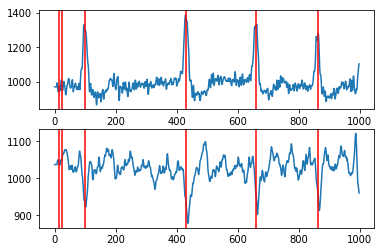

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 1000
ecg0 = record.adc()[0:(n-1),0]
ecg1 = record.adc()[0:(n-1),1]

fig,axarr = plt.subplots(2)
axarr[0].plot(ecg0)
axarr[1].plot(ecg1)

for i in annotation.sample[annotation.sample < n]:
    axarr[0].axvline(i, color='red')
    axarr[1].axvline(i, color='red')

In [71]:
record.adc().shape 
annotation.fs # sampling frequency

annotation.symbol[0:10]

['+', '~', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']

<h1 style='color: blue'> >>> Options for ML methods on ECG sequences (model categories) </h1>

* Graphical models
  * Old school
  * Dynamic Bayesian Nets
  * Interpretable, strong theoretical foundation
  * Related Research
    * http://ieeexplore.ieee.org/document/6091235/?part=1
    * https://www.ncbi.nlm.nih.gov/pubmed/22255457
  * Likelihood function could be used as basis for neural net

* Neural nets
  * Stylish
  * "Compositions of activated linear combinations of big data inputs trained using monte carlo gradients with momentum and regularization" 
  * "Automatic feature learning using multiple convolution kernels"
  * Model selection = black magic
  * Related Research
    * https://arxiv.org/pdf/1707.01836.pdf
    * https://www.sciencedirect.com/science/article/pii/S187705091732450X

* Unsupervised pretraining/clustering
  * Restricted Boltzmann Machines (type of graphical model)
  * K-Means/hclust?
  * Autoencoders

<h1 style='color: blue'> >>> Evaluation and visualization methods </h1>

* Confusion matrix measures
  * Precision, Recall, F1 Score
* http://pages.cs.wisc.edu/~dpage/cs760/evaluating.pdf

* t-sne -- high dimensional data vis
  * http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
  * http://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne

<h1 style='color: blue'> >>> Coding: You know how [0] </h1>

### Let's recap

1. Branching using if statements (expo)
2. Iterating over collections using for (bottom-up)
3. Iterating until you're done using while (stochastic)
4. Iterating on subproblems using recursion (top-down)
5. Organizing your ideas into functions, methods, and classes
6. Intelligent and efficient code using higher-order functions and data abstraction

In [76]:
important_variable = 4

def lots_of_fun(x): # 5
    if important_variable > 3000: # 1
        print('omg, yes way')
    else:
        print('no way, Jose')

lots_of_fun(important_variable)

no way, Jose


In [34]:
import scipy as sci # 7
important_var_list = 2000*sci.random.rand(10) + 2000 # 0

for important_variable in important_var_list: #2
    lots_of_fun(important_variable) #5

omg, yes way
no way, Jose
omg, yes way
no way, Jose
omg, yes way
omg, yes way
no way, Jose
omg, yes way
omg, yes way
omg, yes way


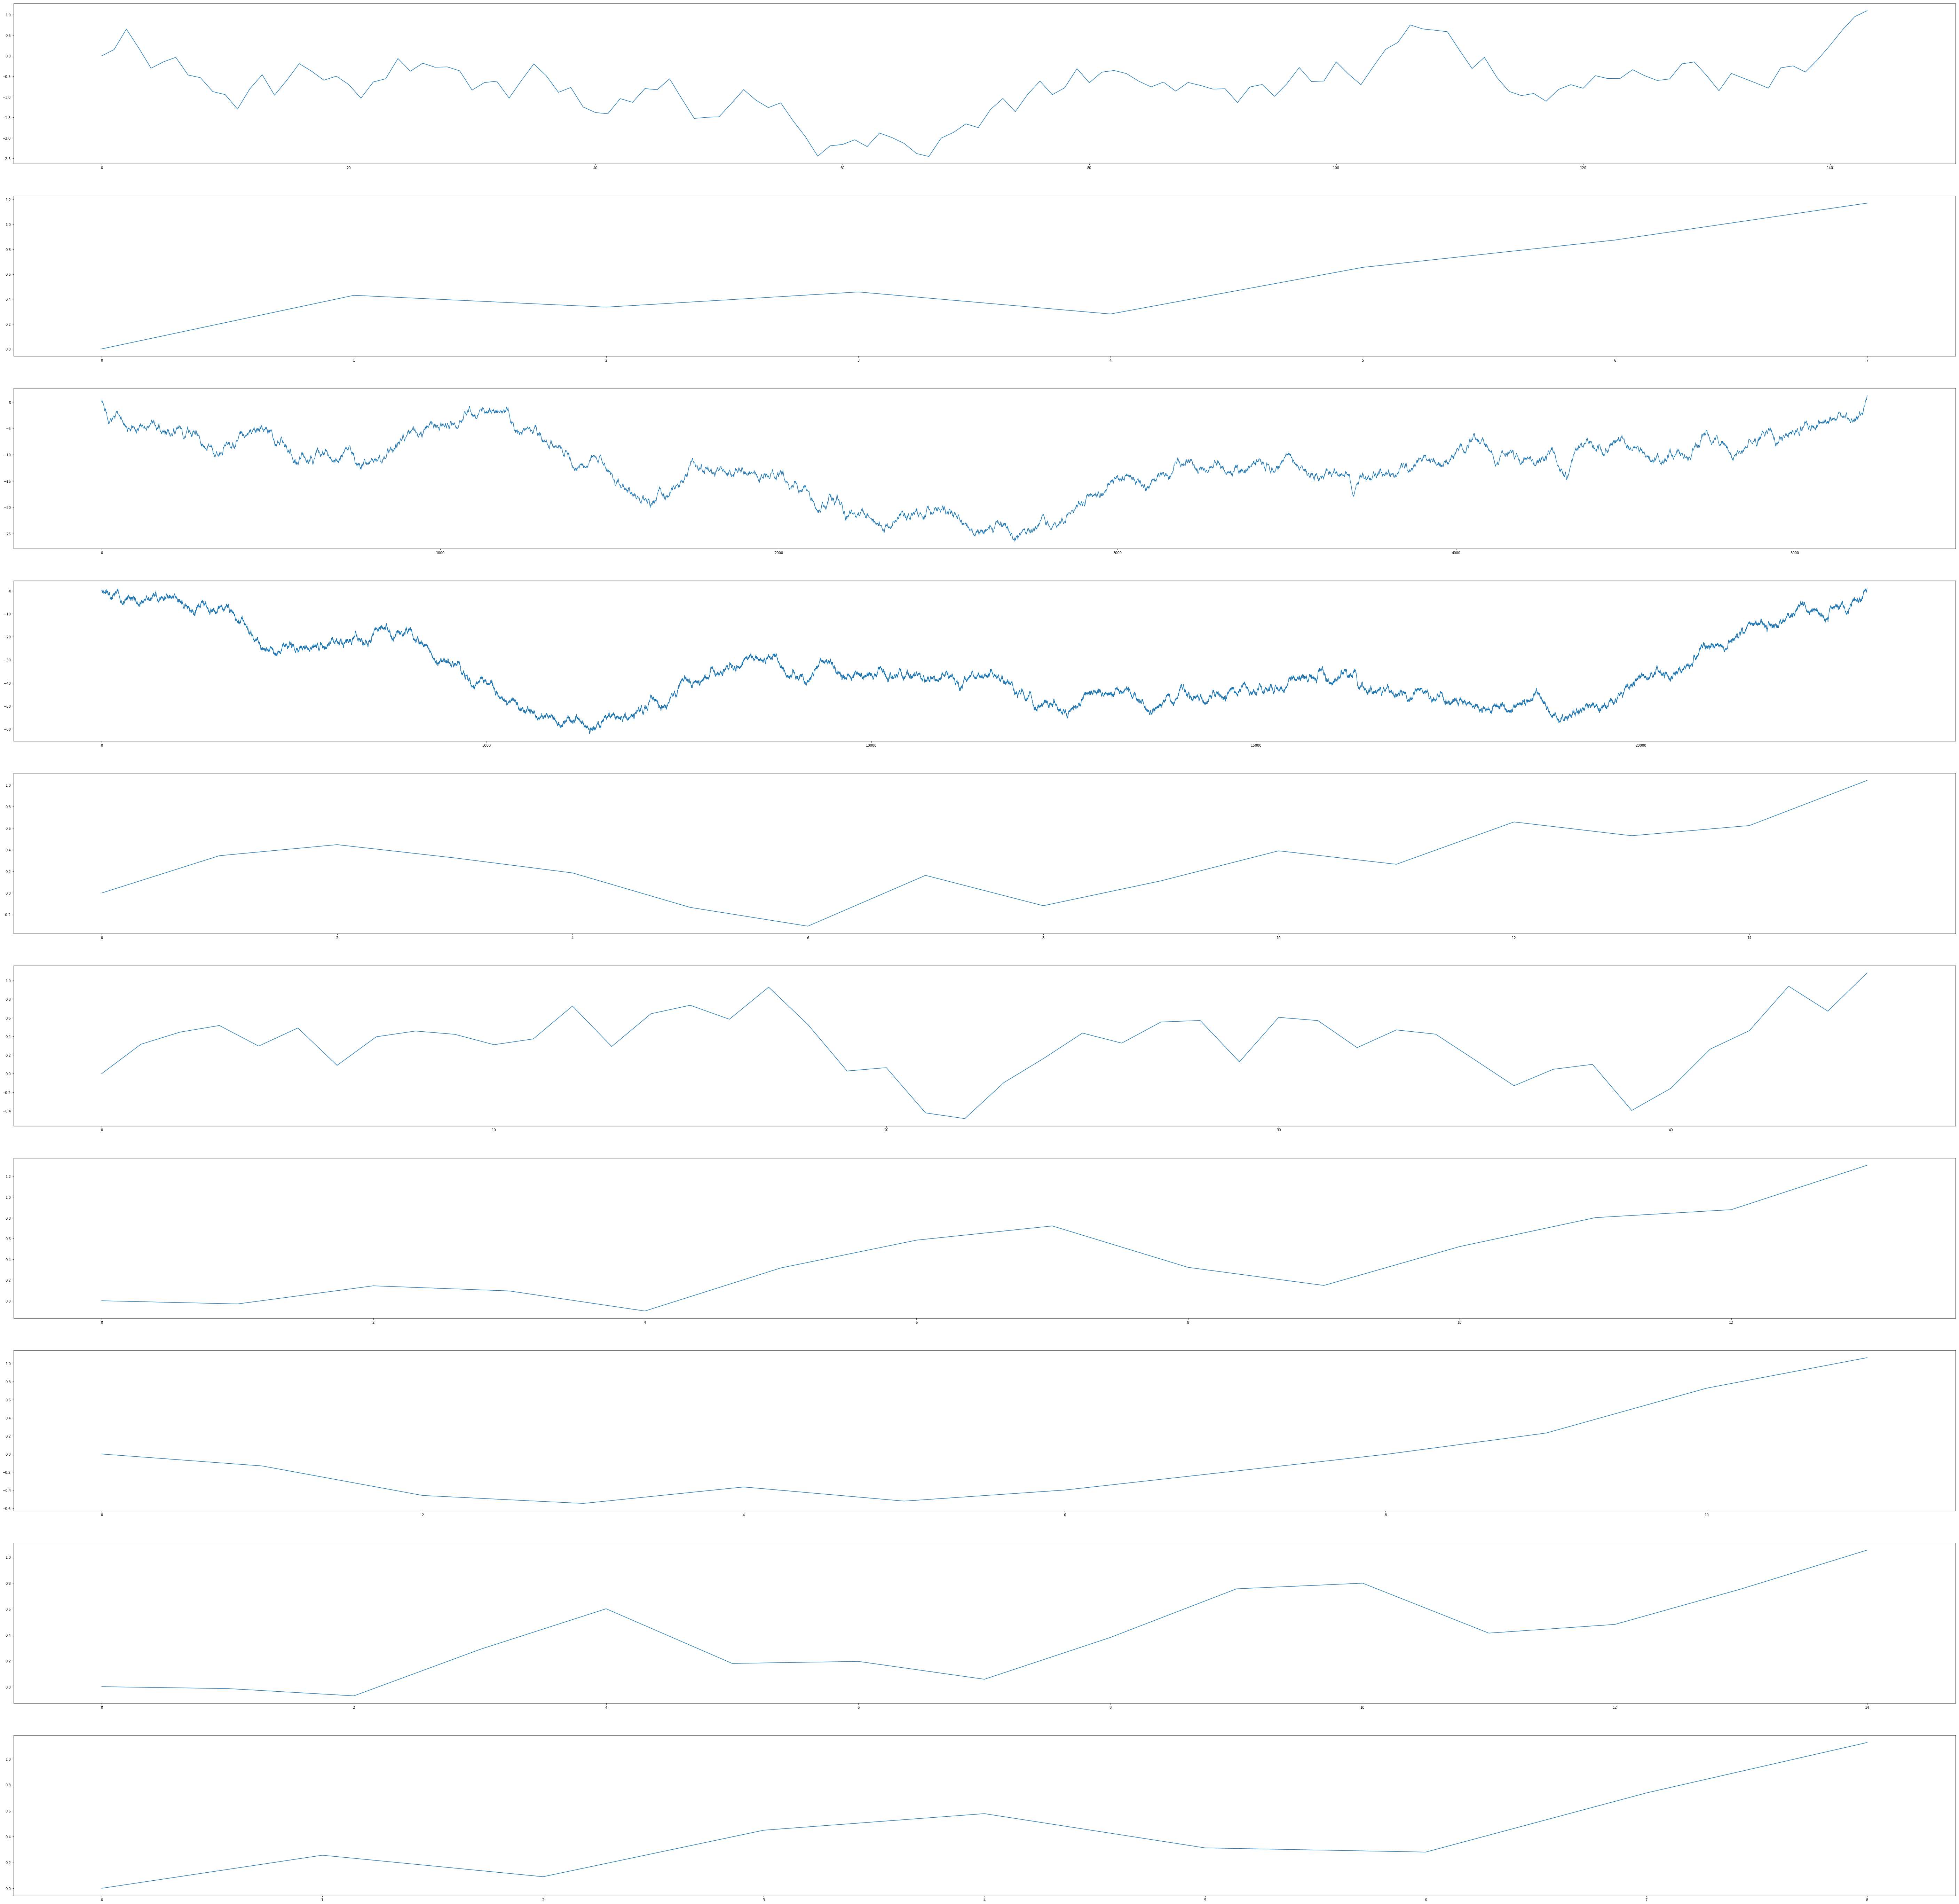

In [37]:
n = 10
list_of_lists = []

for i in range(n):        # 2
    num0 = 0              # Initial conditions
    num_list = [num0]     # Receeding horizon (ask for explanation)

    while num_list[-1] < 1: # 3
        num_list.append(num_list[-1] + sci.random.rand()-0.5)
        # X(t) = X(t-1) + W(t)
        # W(t) ~ Uniform(-0.5,0.5)
    list_of_lists.append(num_list)

fig, axlist = plt.subplots(n, figsize=(100,100))
for l in range(len(list_of_lists)):
    axlist[l].plot(list_of_lists[l])

In [22]:
# Recursion is abstractly applied in dynamic programming functional equations (DPFEs)

def factorial(n):    # Linear time factorial function
    if n <= 1:
        return 1
    else:
        return n*factorial(n-1) # 4 top-down

k = 20
for i in range(k):
    print('factorial({})'.format(str(i)) + ' = ' + str(factorial(i)))

factorial(0) = 1
factorial(1) = 1
factorial(2) = 2
factorial(3) = 6
factorial(4) = 24
factorial(5) = 120
factorial(6) = 720
factorial(7) = 5040
factorial(8) = 40320
factorial(9) = 362880
factorial(10) = 3628800
factorial(11) = 39916800
factorial(12) = 479001600
factorial(13) = 6227020800
factorial(14) = 87178291200
factorial(15) = 1307674368000
factorial(16) = 20922789888000
factorial(17) = 355687428096000
factorial(18) = 6402373705728000
factorial(19) = 121645100408832000


<h1 style='color: blue'> >>> Publishing our Research </h1>

<h1 style='color: blue'> >>> Timeline </h1>

## We will require an MVP by March 1st

# References
* https://matplotlib.org/examples/pylab_examples/subplots_demo.html
* https://arxiv.org/pdf/1707.01836.pdf
* https://www.sciencedirect.com/science/article/pii/S187705091732450X
* http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf